# Método simpléctico multipaso

## Ecuación diferencial no lineal


1. Resolver analíticamente la ecuación diferencial no lineal $$\frac{du}{dt} = u^q\qquad t \in [0,10]. $$

Suponga que $q>1$. Considere la sustitución $r = u^{1-q}$, de modo que $$ \frac{dr}{dt} = \frac{du}{dt} (1-q) u^{-q} = (1-q) u^{q}u^{-q} = (1-q).$$ Esto implica que $ r(t) = (1-q)t + C $ y entonces $$ u(t) = [(1-q)t+C]^{1/(1-q)}.$$ 

En caso que $q=1$, la solución es obvia: $$u(t) = Ce^t.$$ Para $q=0$, tendríamos $$u(t)=t + C. $$

2. Encontrar la solución numéricamente para algunos valores de q.




In [207]:
import numpy as np
import matplotlib.pyplot as plt

In [208]:
q = [0., 0.2, 0.4, 0.7, 0.9, 1.]

In [209]:
def RK4 (f, r0, t, q):
    """
    Implementación del algoritmo de Runge-Kutta de orden 4 para ecuaciones 
    diferenciales ordinarias.

    Args:
    f: función de la ED y'=f(t,y)
    r0: condición inicial
    t: discretización uniformemente espaciada del intervalo temporal.
    """
    h = t[1]-t[0]
    y = r0
    solution = [r0]

    for i in range(1,len(t)):
        k1 = f(t[i-1],y, q)
        k2 = f(t[i-1]+0.5*h, y + 0.5*h*k1, q)
        k3 = f(t[i-1]+0.5*h, y + 0.5*h*k2, q)
        k4 = f(t[i-1]+h, y + h*k3, q)

        y += h*(k1+2*k2+2*k3+k4)/6.
        solution += [y]

    return np.array(solution)

In [210]:
t = np.linspace(0,10,1000)

In [211]:
def func(t, u, q):
    return u**q

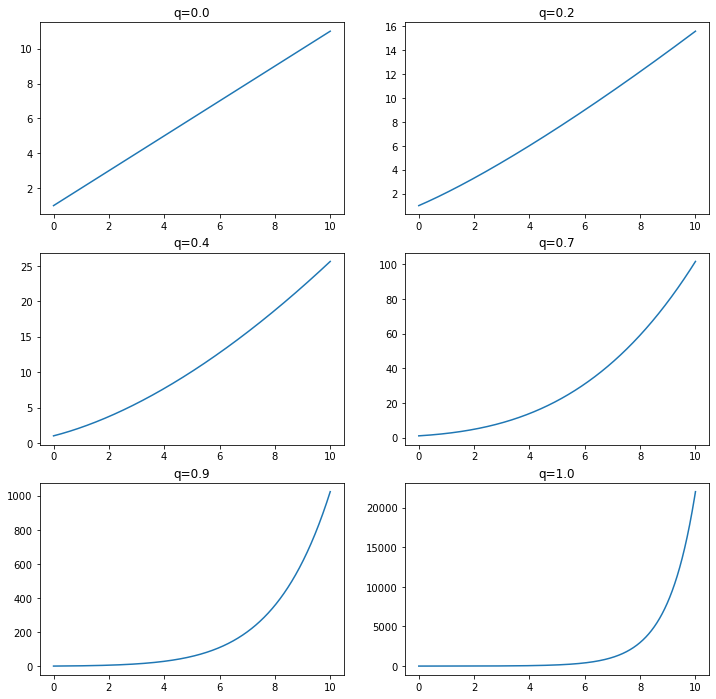

In [212]:
plt.figure(figsize=(12,12))

for i, val in enumerate(q):
    plt.subplot(3,2,i+1)
    u = RK4(func, 1., t, val)
    plt.plot(t,u)
    plt.title('q={:.1f}'.format(val))

plt.show()

## Métodos multi-paso

In [213]:
import numpy as np
import sympy as sym

In [214]:
t = sym.Symbol('t',Real=True)
h = sym.Symbol('h',Real=True)

1. Encuentre los coeficientes del método de Adams-Bashforth de tres puntos.
$$[f_n, t_n] [f_{n-1}, t_{n-1}] [f_{n-2}, t_{n-2}]$$
$$f_n =  \left( \frac{t-t_{n-1}}{t_n - t_{n-1}} \right) \left( \frac{t-t_{n-2}}{t_n - t_{n-2}} \right) $$

In [215]:
F1 = (t-(-h))*(t-(-2*h))/(2*h**2)
F2 = -(t-(0))*(t-(-2*h))/(h**2)
F3 = (t-(-h))*(t-(0))/(2*h**2)

In [216]:
I1 = sym.integrate(F1, (t,0,h))
I2 = sym.integrate(F2, (t,0,h))
I3 = sym.integrate(F3, (t,0,h))
print(I1,I2,I3)

23*h/12 -4*h/3 5*h/12


2. Encuentre los coeficientes del método de Adams-Bashforth de cuatro puntos.
$$[f_n, t_n] [f_{n-1}, t_{n-1}] [f_{n-2}, t_{n-2}][f_{n-3}, t_{n-3}]$$
$$f_n = \left( \frac{t-t_{n-1}}{t_n - t_{n-1}} \right) \left( \frac{t-t_{n-2}}{t_n - t_{n-2}} \right) \left( \frac{t-t_{n-3}}{t_n - t_{n-3}} \right)$$

In [217]:
F1 = (t-(-h))*(t-(-2*h))*(t-(-3*h))/(6*h**3)
F2 = -(t-(0))*(t-(-2*h))*(t-(-3*h))/(2*h**3)
F3 = -(t-(0))*(t-(-2*h))*(t-(3*h))/(2*h**3)
F4 = (t-h)*(t-(2*h))*(t-(3*h))/(6*h**3)

In [218]:
I1 = sym.integrate(F1, (t,0,h))
I2 = sym.integrate(F2, (t,0,h))
I3 = sym.integrate(F3, (t,0,h))
I4 = sym.integrate(F4, (t,0,h))
print(I1,I2,I3, I4)

55*h/24 -59*h/24 37*h/24 -3*h/8


3. Encuentre los coeficientes del método de Adams-Moulton de tres puntos.

In [219]:
F1 = (t+(h))*(t+(0))/(2*h**2)
F2 = (t+(-h))*(t+(h))/(h**2)
F3 = (t+(-h))*(t+(0))/(2*h**2)

In [220]:
I1 = sym.integrate(F1, (t,0,h))
I2 = sym.integrate(F2, (t,0,h))
I3 = sym.integrate(F3, (t,0,h))
print(I1,I2,I3)

5*h/12 -2*h/3 -h/12


4. Encuentre los coeficientes del método de Adams-Moulton de cuatro puntos.

In [221]:
F1 = (t+(2*h))*(t+(0))*(t+(h))/(6*h**3)
F2 = -(t+(h))*(t+(2*h))*(t+(-h))/(2*h**3)
F3 = (t+(-h))*(t+(2*h))*(t-(0))/(2*h**3)
F4 = -(t+(-h))*(t+(0))*(t+(h))/(6*h**3)

In [222]:
I1 = sym.integrate(F1, (t,0,h))
I2 = sym.integrate(F2, (t,0,h))
I3 = sym.integrate(F3, (t,0,h))
I4 = sym.integrate(F4, (t,0,h))
print(I1,I2,I3, I4)

3*h/8 19*h/24 -5*h/24 h/24


## Gravitational $ N $-body problem

## 4th Order Symplectic Integrator

In [229]:
del t
del h

NameError: name 't' is not defined

In [240]:
import numpy as np

In [241]:
def RK4 (f, r0, t):
    """
    Implementación del algoritmo de Runge-Kutta de orden 4 para resolver sistemas
    de ecuaciones diferenciales.

    Args:
    f: función de la ED y'=f(t,y)
    r0: condición inicial
    t: discretización uniformemente espaciada del intervalo temporal.
    """
    h = t[1]-t[0]
    y = r0
    solution = np.array(r0)

    for i in range(1,len(t)):
        k1 = f(t[i-1],y)
        k2 = f(t[i-1]+0.5*h, y + 0.5*h*k1)
        k3 = f(t[i-1]+0.5*h, y + 0.5*h*k2)
        k4 = f(t[i-1]+h, y + h*k3)

        y = y+ h*(k1+2*k2+2*k3+k4)/6.
        solution = np.vstack([solution, y])

    return solution

In [242]:
def f(t,x):
    """
    t: tiempo
    x: vector de dos componentes.
    --- x[0]: posición, x
    --- x[1]: velocidad, v
    """
    return np.array([x[1],-x[0]])

In [245]:
t = np.linspace(0,10)
r0 = np.array([1,0])
sol = RK4(f, r0, t)

In [276]:
def calculateEnergy(x,v):
    return 0.5*(np.power(x,2)+np.power(v,2))

[0.5        0.4999995  0.499999   0.4999985  0.499998   0.4999975
 0.49999701 0.49999651 0.49999601 0.49999551 0.49999501 0.49999451
 0.49999401 0.49999351 0.49999301 0.49999251 0.49999201 0.49999152
 0.49999102 0.49999052 0.49999002 0.49998952 0.49998902 0.49998852
 0.49998802 0.49998752 0.49998702 0.49998652 0.49998603 0.49998553
 0.49998503 0.49998453 0.49998403 0.49998353 0.49998303 0.49998253
 0.49998203 0.49998153 0.49998103 0.49998054 0.49998004 0.49997954
 0.49997904 0.49997854 0.49997804 0.49997754 0.49997704 0.49997654
 0.49997604 0.49997554]


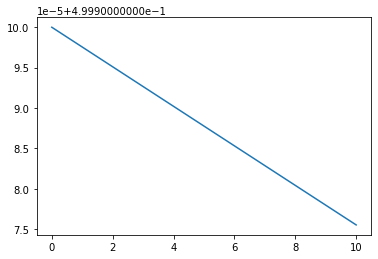

In [277]:
E = calculateEnergy(sol[:,0],sol[:,1])
plt.plot(t,E)
plt.xlabel('t[s]')
plt.ylabel('E[J]')